#I. Preparation

Load necessary libraries

In [11]:
#load necessary libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.mpl_style','default')
%matplotlib inline
import re
import pygal
from IPython.display import SVG



In [12]:
!pip freeze | grep ipython

ipython==3.0.0
ipython-sql==0.3.4


In [13]:
!pip freeze | grep matplotlib

matplotlib==1.4.0


In [14]:
pd.__version__, np.__version__,pygal.__version__, re.__version__


('0.15.1', '1.9.1', '1.5.1', '2.2.1')

#II. Load and verify data

This is the original data frame:

In [15]:
df=pd.read_excel('../Data/ZOODATA_140923.xlsx')

In [16]:
df.describe()

,date,image,objective,time PF,# of cells,meiotic,stage,cell diameter (um),Spindle Length_ asters (um),Spindle length_poles (um),...,Distance between chromosomes (um),microscope,fixation,organism,phylum,classification,genome,chromosomes,Day,cleavage type
count,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,...,2001,2001,2001,2001,1990,2001,2001,2001,2001,2001
unique,32,1497,13,45,15,2,10,1833,1587,1524,...,417,50,4,20,10,4,17,13,29,9
top,140603,131121_urchinUrchin_2hrPF 6,40x,na,1,f,m,na,na,na,...,0,mm40,df,urechis caupo,echinodermata,bd,na,18,140603,rah
freq,590,18,1219,671,700,1528,1165,54,102,30,...,1435,1196,909,508,700,1132,643,605,590,711


In [17]:
df.columns

Index([u'date', u'image', u'objective', u'time PF', u'# of cells', u'meiotic', u'stage', u'cell diameter (um)', u'Spindle Length_ asters (um)', u'Spindle length_poles (um)', u'spindle width (um)', u'spindle aspect ratio_asters (um)', u'spindle aspect ratio_poles (um)', u'astere-to-pole distance 1 (um)', u'aster-to-pole distance 2 (um)', u'inner aster diameter 1 (um)', u'inner aster diameter 2 (um)', u'outer aster diameter 1 (um)', u'outer  diameter 2 (um)', u'centrosome', u'metaphase plate lengt h (um)', u'metaphase plate width (um)', u'metaphase plate aspect ratio (um)', u'polar body diameter 1 (um)', u'polar body diameter 2 (um)', u'Distance between chromosomes (um)', u'microscope', u'fixation', u'organism', u'phylum', u'classification', u'genome', u'chromosomes', u'Day', u'cleavage type'], dtype='object')

This is the 'clean' data frame:

In [18]:
dfo=pd.read_csv('../Data/original.csv')
#this is the cleaned up data frame

In [19]:
dfo.describe()

,time_pf,meiotic,cell_diameter_um,spindle_length__asters_um,spindle_length_poles_um,spindle_width_um,spindle_aspect_ratio_asters_um,spindle_aspect_ratio_poles_um,astere-to-pole_distance_1_um,aster-to-pole_distance_2_um,...,chromosomes,num_of_cells_CAT,num_of_cells_NUM,classification_CAT,phylum_CAT,organism_CAT,cleavage_type_CAT,fixation_CAT,microscope_CAT,stage_CAT
count,2001.000000,2001.000000,1947.000000,1899.000000,1971.000000,1851.000000,1836.000000,1836.000000,1834.000000,1788.000000,...,1997.000000,1914.000000,1914.000000,2001.000000,2001.000000,2001.000000,2001.000000,1863.000000,1863.000000,1993.000000
mean,220.012994,0.236382,108.800352,30.644614,22.373868,11.518706,2.700673,2.040230,1.231875,1.144923,...,29.706560,3.748171,14.229885,1.804598,3.413293,6.022489,3.205897,2.300590,7.286098,2.809834
std,186.964737,0.424966,157.838006,18.152905,12.011064,5.403774,1.339841,0.962627,2.457425,2.643949,...,10.908621,3.379052,25.527277,0.949894,2.229261,3.701350,1.982066,0.649576,13.034666,2.247592
min,0.000000,0.000000,0.100000,2.005080,2.005080,0.000000,0.478892,0.601124,0.000000,0.000000,...,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,60.000000,0.000000,42.563550,18.078060,14.191200,7.655740,1.869799,1.480595,0.000000,0.000000,...,18.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2.000000,1.000000,2.000000
50%,210.000000,0.000000,76.600000,27.383280,21.166530,10.542840,2.419101,1.829586,0.000000,0.000000,...,36.000000,3.000000,4.000000,1.000000,4.000000,6.000000,3.000000,2.000000,1.000000,2.000000
75%,390.000000,0.000000,112.341810,40.069260,28.305585,14.771295,3.170257,2.359085,1.900000,1.540192,...,40.000000,5.000000,16.000000,3.000000,5.000000,7.000000,5.000000,3.000000,3.000000,2.000000
max,1200.000000,1.000000,1486.643200,210.371700,231.000000,49.771260,21.111111,17.500000,28.000000,39.800000,...,64.000000,15.000000,128.000000,4.000000,10.000000,20.000000,9.000000,3.000000,50.000000,10.000000


In [20]:
dfo.organism.unique()

array(['asterina_miniata', 'caenorhabditis_elegans',
       'cerebratulus_marginatus', 'ciona_intestinalis',
       'helobdella_robusta', 'Strongylocentrotus_purpuratus',
       'urechis_caupo', 'xenopus_laevis', 'mytilus_californianus',
       'xenopus_tropicalis', 'Equus_caballus', 'Homo_sapiens',
       'Macaca_mulatta', 'Callithrix_jacchus', 'monodelphis_domestica',
       'sus_scrofa', 'mus_musculus', 'drosophila_melanogaster',
       'danio_rerio', 'Clytia_hemisphaerica_1'], dtype=object)

##III. Get metaphase spindles only

This is for both meiotic and mitotic spindles. Later clean mitotic too by narrowing down cell number.

In [21]:
dfo.columns

Index([u'time_pf', u'num_of_cells', u'meiotic', u'stage', u'cell_diameter_um', u'spindle_length__asters_um', u'spindle_length_poles_um', u'spindle_width_um', u'spindle_aspect_ratio_asters_um', u'spindle_aspect_ratio_poles_um', u'astere-to-pole_distance_1_um', u'aster-to-pole_distance_2_um', u'inner_aster_diameter_1_um', u'inner_aster_diameter_2_um', u'outer_aster_diameter_1_um', u'outer__diameter_2_um', u'centrosome', u'metaphase_plate_lengt_h_um', u'metaphase_plate_width_um', u'metaphase_plate_aspect_ratio_um', u'polar_body_diameter_1_um', u'polar_body_diameter_2_um', u'distance_between_chromosomes_um', u'microscope', u'fixation', u'organism', u'phylum', u'classification', u'genome', u'chromosomes', u'cleavage_type', u'num_of_cells_CAT', u'num_of_cells_NUM', u'classification_CAT', u'phylum_CAT', u'organism_CAT', u'cleavage_type_CAT', u'fixation_CAT', u'microscope_CAT', u'stage_CAT', u'day_old'], dtype='object')

In [22]:
dfo.stage.unique() # KEEP: m, mI, mII

array(['a', 'm', 'p', nan, 'mII', 'aII', 'mI', 'aI', 'i', 'pI'], dtype=object)

In [23]:
dfo[dfo.organism=='xenopus_laevis'].stage.unique()

array(['a', 'm', 'mII'], dtype=object)

In [24]:
dfo_met=dfo[(dfo.stage=='m') | (dfo.stage=='mII') | (dfo.stage=='mI')]

In [25]:
dfo_met.stage.unique()

array(['m', 'mII', 'mI'], dtype=object)

From now on use only *dfo_met*.

In [26]:
dfo_met.describe()

,time_pf,meiotic,cell_diameter_um,spindle_length__asters_um,spindle_length_poles_um,spindle_width_um,spindle_aspect_ratio_asters_um,spindle_aspect_ratio_poles_um,astere-to-pole_distance_1_um,aster-to-pole_distance_2_um,...,chromosomes,num_of_cells_CAT,num_of_cells_NUM,classification_CAT,phylum_CAT,organism_CAT,cleavage_type_CAT,fixation_CAT,microscope_CAT,stage_CAT
count,1462.000000,1462.000000,1420.000000,1382.000000,1454.000000,1378.000000,1367.000000,1367.000000,1336.000000,1295.000000,...,1458.000000,1379.000000,1379.000000,1462.000000,1462.000000,1462.000000,1462.000000,1334.000000,1334.000000,1462.000000
mean,219.285226,0.243502,116.158036,29.185663,21.436538,10.959256,2.700733,2.051615,1.262303,1.150215,...,29.961591,3.824511,15.275562,1.751026,3.541724,6.247606,3.248290,2.341079,7.637181,2.884405
std,195.824881,0.429342,177.188003,16.223349,10.603169,4.794386,1.174378,0.826944,2.251049,2.380378,...,10.751509,3.454192,27.005903,0.935048,2.343084,4.009773,2.000833,0.644562,14.019341,1.802247
min,0.000000,0.000000,4.252710,2.669100,2.036700,1.083390,0.798403,0.601124,0.000000,0.000000,...,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,45.000000,0.000000,40.908875,17.028807,13.178550,7.274445,1.924282,1.502997,0.000000,0.000000,...,18.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2.000000,1.000000,2.000000
50%,180.000000,0.000000,74.029300,26.365490,21.045255,10.100000,2.455206,1.855302,0.000000,0.000000,...,36.000000,3.000000,4.000000,1.000000,4.000000,6.000000,3.000000,2.000000,1.000000,2.000000
75%,380.000000,0.000000,116.021107,38.597597,27.601643,14.336000,3.158998,2.379603,2.077845,1.891890,...,40.000000,5.000000,16.000000,3.000000,5.000000,7.000000,5.000000,3.000000,3.000000,2.000000
max,1200.000000,1.000000,1486.643200,128.900000,63.692800,29.761640,9.385000,7.715753,28.000000,39.800000,...,64.000000,15.000000,128.000000,4.000000,10.000000,20.000000,9.000000,3.000000,50.000000,7.000000


Have a look at subsetted data:

In [27]:
dfo_met[dfo_met.organism=='xenopus_laevis']['meiotic'].value_counts()

0    135
1     18
dtype: int64

In [28]:
dfo[dfo.organism=='xenopus_laevis']['meiotic'].value_counts()

0    146
1     18
dtype: int64

In [29]:
dfo_met[dfo_met.organism=='xenopus_laevis']['centrosome'].value_counts()

1    135
0     18
dtype: int64

In [30]:
dfo[dfo.organism=='xenopus_laevis']['centrosome'].value_counts()

1    146
0     18
dtype: int64

In [31]:
dfo[dfo.organism =='mus_musculus'].describe()

,time_pf,meiotic,cell_diameter_um,spindle_length__asters_um,spindle_length_poles_um,spindle_width_um,spindle_aspect_ratio_asters_um,spindle_aspect_ratio_poles_um,astere-to-pole_distance_1_um,aster-to-pole_distance_2_um,...,chromosomes,num_of_cells_CAT,num_of_cells_NUM,classification_CAT,phylum_CAT,organism_CAT,cleavage_type_CAT,fixation_CAT,microscope_CAT,stage_CAT
count,85.000000,85.000000,78.000000,11.000000,83.000000,11.000000,1.000000,1.000000,11,11,...,85,85.000000,85.000000,85,85.000000,85,85,0,0,85.000000
mean,110.117647,0.152941,39.943846,26.865455,19.898434,15.220000,1.555556,1.555556,0,0,...,40,4.352941,25.905882,1,9.082353,17,2,NaN,NaN,2.400000
std,47.068696,0.362067,21.053027,5.160381,6.170890,3.165691,NaN,NaN,0,0,...,0,3.084932,42.581190,0,2.172401,0,0,NaN,NaN,1.283596
min,0.000000,0.000000,13.500000,15.120000,7.500000,9.720000,1.555556,1.555556,0,0,...,40,1.000000,1.000000,1,4.000000,17,2,NaN,NaN,2.000000
25%,130.000000,0.000000,25.462500,24.450000,15.875000,14.250000,1.555556,1.555556,0,0,...,40,1.000000,1.000000,1,10.000000,17,2,NaN,NaN,2.000000
50%,130.000000,0.000000,33.375000,28.000000,20.750000,14.600000,1.555556,1.555556,0,0,...,40,4.000000,8.000000,1,10.000000,17,2,NaN,NaN,2.000000
75%,130.000000,0.000000,52.062500,29.850000,24.125000,15.700000,1.555556,1.555556,0,0,...,40,5.000000,16.000000,1,10.000000,17,2,NaN,NaN,2.000000
max,130.000000,1.000000,96.500000,34.500000,34.500000,21.100000,1.555556,1.555556,0,0,...,40,10.000000,128.000000,1,10.000000,17,2,NaN,NaN,7.000000


In [44]:
dfo_met[dfo_met.organism =='mus_musculus'].describe()

,time_pf,meiotic,cell_diameter_um,spindle_length__asters_um,spindle_length_poles_um,spindle_width_um,spindle_aspect_ratio_asters_um,spindle_aspect_ratio_poles_um,astere-to-pole_distance_1_um,aster-to-pole_distance_2_um,...,chromosomes,num_of_cells_CAT,num_of_cells_NUM,classification_CAT,phylum_CAT,organism_CAT,cleavage_type_CAT,fixation_CAT,microscope_CAT,stage_CAT
count,85.000000,85.000000,78.000000,11.000000,83.000000,11.000000,1.000000,1.000000,11,11,...,85,85.000000,85.000000,85,85.000000,85,85,0,0,85.000000
mean,110.117647,0.152941,39.943846,26.865455,19.898434,15.220000,1.555556,1.555556,0,0,...,40,4.352941,25.905882,1,9.082353,17,2,NaN,NaN,2.400000
std,47.068696,0.362067,21.053027,5.160381,6.170890,3.165691,NaN,NaN,0,0,...,0,3.084932,42.581190,0,2.172401,0,0,NaN,NaN,1.283596
min,0.000000,0.000000,13.500000,15.120000,7.500000,9.720000,1.555556,1.555556,0,0,...,40,1.000000,1.000000,1,4.000000,17,2,NaN,NaN,2.000000
25%,130.000000,0.000000,25.462500,24.450000,15.875000,14.250000,1.555556,1.555556,0,0,...,40,1.000000,1.000000,1,10.000000,17,2,NaN,NaN,2.000000
50%,130.000000,0.000000,33.375000,28.000000,20.750000,14.600000,1.555556,1.555556,0,0,...,40,4.000000,8.000000,1,10.000000,17,2,NaN,NaN,2.000000
75%,130.000000,0.000000,52.062500,29.850000,24.125000,15.700000,1.555556,1.555556,0,0,...,40,5.000000,16.000000,1,10.000000,17,2,NaN,NaN,2.000000
max,130.000000,1.000000,96.500000,34.500000,34.500000,21.100000,1.555556,1.555556,0,0,...,40,10.000000,128.000000,1,10.000000,17,2,NaN,NaN,7.000000


For radar plot we need (0) metpahse spindles (done), (1) means of numeric columns. We need to (2) remove the _CAT columns but (3) put back the organism column for grouping.

In [32]:
list(dfo_met.columns)

['time_pf',
 'num_of_cells',
 'meiotic',
 'stage',
 'cell_diameter_um',
 'spindle_length__asters_um',
 'spindle_length_poles_um',
 'spindle_width_um',
 'spindle_aspect_ratio_asters_um',
 'spindle_aspect_ratio_poles_um',
 'astere-to-pole_distance_1_um',
 'aster-to-pole_distance_2_um',
 'inner_aster_diameter_1_um',
 'inner_aster_diameter_2_um',
 'outer_aster_diameter_1_um',
 'outer__diameter_2_um',
 'centrosome',
 'metaphase_plate_lengt_h_um',
 'metaphase_plate_width_um',
 'metaphase_plate_aspect_ratio_um',
 'polar_body_diameter_1_um',
 'polar_body_diameter_2_um',
 'distance_between_chromosomes_um',
 'microscope',
 'fixation',
 'organism',
 'phylum',
 'classification',
 'genome',
 'chromosomes',
 'cleavage_type',
 'num_of_cells_CAT',
 'num_of_cells_NUM',
 'classification_CAT',
 'phylum_CAT',
 'organism_CAT',
 'cleavage_type_CAT',
 'fixation_CAT',
 'microscope_CAT',
 'stage_CAT',
 'day_old']

These are the potential numeric variables. We need to remove columns containing numerical encodings 

In [48]:
dfo_met._get_numeric_data().columns

Index([u'time_pf', u'meiotic', u'cell_diameter_um', u'spindle_length__asters_um', u'spindle_length_poles_um', u'spindle_width_um', u'spindle_aspect_ratio_asters_um', u'spindle_aspect_ratio_poles_um', u'astere-to-pole_distance_1_um', u'aster-to-pole_distance_2_um', u'inner_aster_diameter_1_um', u'inner_aster_diameter_2_um', u'outer_aster_diameter_1_um', u'outer__diameter_2_um', u'centrosome', u'metaphase_plate_lengt_h_um', u'metaphase_plate_width_um', u'metaphase_plate_aspect_ratio_um', u'polar_body_diameter_1_um', u'polar_body_diameter_2_um', u'distance_between_chromosomes_um', u'genome', u'chromosomes', u'num_of_cells_CAT', u'num_of_cells_NUM', u'classification_CAT', u'phylum_CAT', u'organism_CAT', u'cleavage_type_CAT', u'fixation_CAT', u'microscope_CAT', u'stage_CAT'], dtype='object')

In [49]:
#get all columns that end with CAT (or their position in the data frame)
pattern=re.compile(r"(.+_CAT)")
#print pattern.match('organism_CAT').group()

In [50]:
cols_to_drop=[]
for column in dfo_met._get_numeric_data().columns:
    #print column
    if pattern.match(column) != None:
        cols_to_drop.append(pattern.match(column).group())

In [51]:
cols_to_drop

['num_of_cells_CAT',
 'classification_CAT',
 'phylum_CAT',
 'organism_CAT',
 'cleavage_type_CAT',
 'fixation_CAT',
 'microscope_CAT',
 'stage_CAT']

In [52]:
#sanity check; looking good
dfo_met._get_numeric_data()[cols_to_drop].head()

,num_of_cells_CAT,classification_CAT,phylum_CAT,organism_CAT,cleavage_type_CAT,fixation_CAT,microscope_CAT,stage_CAT
1,1,1,1,1,1,1,1,2
3,1,1,1,1,1,1,1,2
5,2,1,1,1,1,1,1,2
6,2,1,1,1,1,1,1,2
9,1,1,1,1,1,1,1,2


In [53]:
dfo_for_pygal=dfo_met._get_numeric_data().drop(cols_to_drop,axis=1)

In [54]:
dfo_met.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 1 to 2000
Data columns (total 41 columns):
time_pf                            1462 non-null int64
num_of_cells                       1379 non-null object
meiotic                            1462 non-null int64
stage                              1462 non-null object
cell_diameter_um                   1420 non-null float64
spindle_length__asters_um          1382 non-null float64
spindle_length_poles_um            1454 non-null float64
spindle_width_um                   1378 non-null float64
spindle_aspect_ratio_asters_um     1367 non-null float64
spindle_aspect_ratio_poles_um      1367 non-null float64
astere-to-pole_distance_1_um       1336 non-null float64
aster-to-pole_distance_2_um        1295 non-null float64
inner_aster_diameter_1_um          1304 non-null float64
inner_aster_diameter_2_um          1224 non-null float64
outer_aster_diameter_1_um          1173 non-null float64
outer__diameter_2_um               1105 non-

In [55]:
dfo_for_pygal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 1 to 2000
Data columns (total 24 columns):
time_pf                            1462 non-null int64
meiotic                            1462 non-null int64
cell_diameter_um                   1420 non-null float64
spindle_length__asters_um          1382 non-null float64
spindle_length_poles_um            1454 non-null float64
spindle_width_um                   1378 non-null float64
spindle_aspect_ratio_asters_um     1367 non-null float64
spindle_aspect_ratio_poles_um      1367 non-null float64
astere-to-pole_distance_1_um       1336 non-null float64
aster-to-pole_distance_2_um        1295 non-null float64
inner_aster_diameter_1_um          1304 non-null float64
inner_aster_diameter_2_um          1224 non-null float64
outer_aster_diameter_1_um          1173 non-null float64
outer__diameter_2_um               1105 non-null float64
centrosome                         1462 non-null int64
metaphase_plate_lengt_h_um         1226 non-

In [56]:
dfo_for_pygal.head(2)

,time_pf,meiotic,cell_diameter_um,spindle_length__asters_um,spindle_length_poles_um,spindle_width_um,spindle_aspect_ratio_asters_um,spindle_aspect_ratio_poles_um,astere-to-pole_distance_1_um,aster-to-pole_distance_2_um,...,centrosome,metaphase_plate_lengt_h_um,metaphase_plate_width_um,metaphase_plate_aspect_ratio_um,polar_body_diameter_1_um,polar_body_diameter_2_um,distance_between_chromosomes_um,genome,chromosomes,num_of_cells_NUM
1,210,0,163.05828,24.85329,18.28827,9.97689,2.491086,1.833063,0,0,...,1,9.02286,2.40933,3.744966,NaN,NaN,0,811,36,1
3,210,0,194.04000,42.39774,42.39774,17.46360,2.427778,2.427778,0,0,...,1,7.72926,4.02633,1.919679,8.23053,NaN,0,811,36,1


##### Putting some categorical columns back: 'organism'. 'num_of_cells_NUM' is still there. Keep it!

In [57]:
#put the organism column back
dfo_for_pygal['organism']=dfo_met.organism
#dfo.organism

In [59]:
dfo_for_pygal.organism

1     asterina_miniata
3     asterina_miniata
5     asterina_miniata
6     asterina_miniata
9     asterina_miniata
10    asterina_miniata
11    asterina_miniata
12    asterina_miniata
13    asterina_miniata
15    asterina_miniata
17    asterina_miniata
18    asterina_miniata
22    asterina_miniata
23    asterina_miniata
24    asterina_miniata
...
1986    mus_musculus
1987    mus_musculus
1988    mus_musculus
1989    mus_musculus
1990    mus_musculus
1991    mus_musculus
1992    mus_musculus
1993    mus_musculus
1994    mus_musculus
1995    mus_musculus
1996    mus_musculus
1997    mus_musculus
1998    mus_musculus
1999    mus_musculus
2000    mus_musculus
Name: organism, Length: 1462, dtype: object

In [60]:
dfo_for_pygal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 1 to 2000
Data columns (total 25 columns):
time_pf                            1462 non-null int64
meiotic                            1462 non-null int64
cell_diameter_um                   1420 non-null float64
spindle_length__asters_um          1382 non-null float64
spindle_length_poles_um            1454 non-null float64
spindle_width_um                   1378 non-null float64
spindle_aspect_ratio_asters_um     1367 non-null float64
spindle_aspect_ratio_poles_um      1367 non-null float64
astere-to-pole_distance_1_um       1336 non-null float64
aster-to-pole_distance_2_um        1295 non-null float64
inner_aster_diameter_1_um          1304 non-null float64
inner_aster_diameter_2_um          1224 non-null float64
outer_aster_diameter_1_um          1173 non-null float64
outer__diameter_2_um               1105 non-null float64
centrosome                         1462 non-null int64
metaphase_plate_lengt_h_um         1226 non-

##### This is the column for additional filtering. For 'meiotic' == 0, get 'num_of_cells_NUM' from 1-4 (incl.).

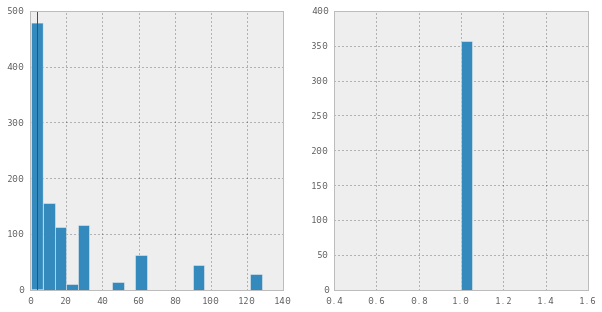

In [72]:
plt.figure(figsize=(10,5))
plt.subplot(121)
dfo_for_pygal[dfo_for_pygal.meiotic==0].num_of_cells_NUM.hist(bins=20) #drop this one too?
plt.axvline(x=4,color='red')
plt.subplot(122)
dfo_for_pygal[dfo_for_pygal.meiotic==1].num_of_cells_NUM.hist(bins=20) #drop this one too?

In [75]:
#dfo_for_pygal_2=dfo_for_pygal.drop('num_of_cells_NUM',axis=1)
print dfo_for_pygal[dfo_for_pygal.meiotic==0].num_of_cells_NUM.unique()
print dfo_for_pygal[dfo_for_pygal.meiotic==1].num_of_cells_NUM.unique()

[   1.    2.    4.    8.   16.   26.   12.   64.  128.   32.   48.   96.
   28.   nan]
[ 1.]


In [76]:
dfo_for_pygal.shape

(1462, 25)

In [82]:
dfo_for_pygal[(dfo_for_pygal.num_of_cells_NUM==1) | (dfo_for_pygal.num_of_cells_NUM==2) | (dfo_for_pygal.num_of_cells_NUM==4)].num_of_cells_NUM.unique()

array([ 1.,  2.,  4.])

In [83]:
dfo_for_pygal_2=dfo_for_pygal[(dfo_for_pygal.num_of_cells_NUM==1) | (dfo_for_pygal.num_of_cells_NUM==2) | (dfo_for_pygal.num_of_cells_NUM==4)]

In [100]:
dfo_for_pygal_2.shape

(834, 24)

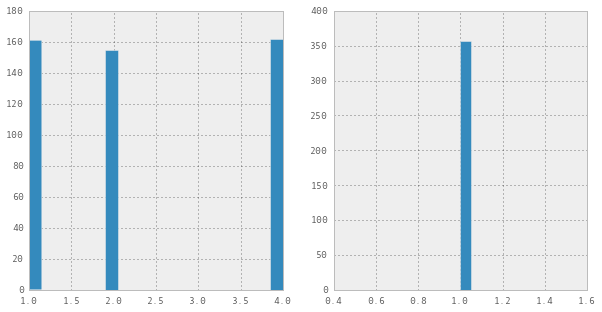

In [85]:
plt.figure(figsize=(10,5))
plt.subplot(121)
dfo_for_pygal_2[dfo_for_pygal_2.meiotic==0].num_of_cells_NUM.hist(bins=20) #drop this one too?
plt.axvline(x=4,color='red')
plt.subplot(122)
dfo_for_pygal_2[dfo_for_pygal_2.meiotic==1].num_of_cells_NUM.hist(bins=20) #drop this one too?

NOW we can drop 'num_of_cells_NUM' column.

In [86]:
dfo_for_pygal_2=dfo_for_pygal_2.drop('num_of_cells_NUM',axis=1)

In [87]:
dfo_for_pygal_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 834 entries, 1 to 2000
Data columns (total 24 columns):
time_pf                            834 non-null int64
meiotic                            834 non-null int64
cell_diameter_um                   793 non-null float64
spindle_length__asters_um          800 non-null float64
spindle_length_poles_um            826 non-null float64
spindle_width_um                   801 non-null float64
spindle_aspect_ratio_asters_um     790 non-null float64
spindle_aspect_ratio_poles_um      790 non-null float64
astere-to-pole_distance_1_um       766 non-null float64
aster-to-pole_distance_2_um        733 non-null float64
inner_aster_diameter_1_um          746 non-null float64
inner_aster_diameter_2_um          686 non-null float64
outer_aster_diameter_1_um          741 non-null float64
outer__diameter_2_um               700 non-null float64
centrosome                         834 non-null int64
metaphase_plate_lengt_h_um         736 non-null float64
meta

In [88]:
grouped_org_mei=dfo_for_pygal_2.groupby(['organism','meiotic'],sort=False)

In [101]:
len(grouped_org_mei) #somehow 2 organisms disappeared. Investigate later by comparing dfo_for_pygal.organism and dfo_for_pygal_2.organism 

29

In [90]:
grouped_org_mei.groups.keys()[0]

('Homo_sapiens', 1)

This is a data frame with the metaphase means per organism, split by meiotic/mitotic:

In [92]:
means=grouped_org_mei.mean()

In [95]:
means.head(2)

time_pf  cell_diameter_um  \
organism         meiotic                                 
asterina_miniata 0        227.647059        148.597495   
                 1          4.285714        220.351184   

                          spindle_length__asters_um  spindle_length_poles_um  \
organism         meiotic                                                       
asterina_miniata 0                        45.122942                29.479782   
                 1                        24.748558                20.470540   

                          spindle_width_um  spindle_aspect_ratio_asters_um  \
organism         meiotic                                                     
asterina_miniata 0               16.841408                        2.752330   
                 1                8.521747                        3.041225   

                          spindle_aspect_ratio_poles_um  \
organism         meiotic                                  
asterina_miniata 0                              1.80070   
                 1                              2.51297   

                          astere-to-pole_distance_1_um  \
organism         meiotic                                 
asterina_miniata 0                            3.611328   
                 1                            0.446234   

                          aster-to-pole_distance_2_um  \
organism         meiotic                                
asterina_miniata 0                           3.849842   
                 1                           0.167230   

                          inner_aster_diameter_1_um     ...       \
organism         meiotic                                ...        
asterina_miniata 0                        10.950803     ...        
                 1                         4.461345     ...        

                          outer__diameter_2_um  centrosome  \
organism         meiotic                                     
asterina_miniata 0                   45.763439           1   
                 1                   24.003288           1   

                          metaphase_plate_lengt_h_um  \
organism         meiotic                               
asterina_miniata 0                         13.578616   
                 1                         12.092656   

                          metaphase_plate_width_um  \
organism         meiotic                             
asterina_miniata 0                        4.752077   
                 1                        5.698895   

                          metaphase_plate_aspect_ratio_um  \
organism         meiotic                                    
asterina_miniata 0                               3.069286   
                 1                               2.193964   

                          polar_body_diameter_1_um  polar_body_diameter_2_um  \
organism         meiotic                                                       
asterina_miniata 0                        9.385763                  9.354763   
                 1                        7.520823                  7.700000   

                          distance_between_chromosomes_um  genome  chromosomes  
organism         meiotic                                                        
asterina_miniata 0                                0.16178     811           36  
                 1                                0.00000     811           36  

[2 rows x 22 columns]

In [96]:
#the table index
means.index.names

FrozenList([u'organism', u'meiotic'])

In [97]:
means.index

MultiIndex(levels=[[u'Callithrix_jacchus', u'Clytia_hemisphaerica_1', u'Equus_caballus', u'Homo_sapiens', u'Macaca_mulatta', u'Strongylocentrotus_purpuratus', u'asterina_miniata', u'caenorhabditis_elegans', u'cerebratulus_marginatus', u'ciona_intestinalis', u'danio_rerio', u'drosophila_melanogaster', u'helobdella_robusta', u'monodelphis_domestica', u'mus_musculus', u'mytilus_californianus', u'sus_scrofa', u'urechis_caupo', u'xenopus_laevis', u'xenopus_tropicalis'], [0, 1]],
           labels=[[6, 6, 7, 7, 8, 8, 9, 9, 12, 12, 5, 5, 17, 17, 18, 18, 15, 19, 2, 3, 4, 0, 13, 16, 14, 14, 11, 10, 1], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1]],
           names=[u'organism', u'meiotic'])

In [98]:
means.loc['xenopus_laevis']

,time_pf,cell_diameter_um,spindle_length__asters_um,spindle_length_poles_um,spindle_width_um,spindle_aspect_ratio_asters_um,spindle_aspect_ratio_poles_um,astere-to-pole_distance_1_um,aster-to-pole_distance_2_um,inner_aster_diameter_1_um,...,outer__diameter_2_um,centrosome,metaphase_plate_lengt_h_um,metaphase_plate_width_um,metaphase_plate_aspect_ratio_um,polar_body_diameter_1_um,polar_body_diameter_2_um,distance_between_chromosomes_um,genome,chromosomes
meiotic,,,,,,,,,,,,,,,,,,,,,
0,98.75,1249.975500,86.945700,50.062600,18.242000,4.901206,2.856703,8.3285,9.5742,23.6907,...,96.7,1,20.721760,5.980640,3.758759,17.712500,8.202136,0,3100,36
1,0.00,1185.384295,29.631899,29.631899,14.966531,1.998537,1.998537,0.0000,0.0000,0.0000,...,0.0,0,15.794306,6.137751,2.812343,12.711531,9.039030,0,3100,36


## Plotting

Test the plot on one organism.

In [102]:
#test the plot on one organism
log_means_1=[np.log10(x) for x in means.loc['xenopus_laevis',1].values] #meiotic
log_means_0=[np.log10(x) for x in means.loc['xenopus_laevis',0].values] #mitotic

In [357]:
means.loc['xenopus_laevis',0].values

array([  4.44888889e+02,   2.27073209e+02,   4.71583227e+01,
         3.48029944e+01,   1.47119545e+01,   3.13489885e+00,
         2.35247062e+00,   2.54882370e+00,   2.22041527e+00,
         1.13998496e+01,   1.50183163e+03,   5.75910570e+01,
         4.37048689e+01,   1.00000000e+00,   1.86787314e+01,
         5.45049143e+00,   3.70456956e+00,   2.77740741e+01,
         8.84065519e+00,   0.00000000e+00,   3.10000000e+03,
         3.60000000e+01])

In [358]:
len(list(means.columns)), len(log_means_0)

(22, 22)

In [359]:
means.columns

Index([u'time_pf', u'cell_diameter_um', u'spindle_length__asters_um', u'spindle_length_poles_um', u'spindle_width_um', u'spindle_aspect_ratio_asters_um', u'spindle_aspect_ratio_poles_um', u'astere-to-pole_distance_1_um', u'aster-to-pole_distance_2_um', u'inner_aster_diameter_1_um', u'inner_aster_diameter_2_um', u'outer_aster_diameter_1_um', u'outer__diameter_2_um', u'centrosome', u'metaphase_plate_lengt_h_um', u'metaphase_plate_width_um', u'metaphase_plate_aspect_ratio_um', u'polar_body_diameter_1_um', u'polar_body_diameter_2_um', u'distance_between_chromosomes_um', u'genome', u'chromosomes'], dtype='object')

### Preliminary plot

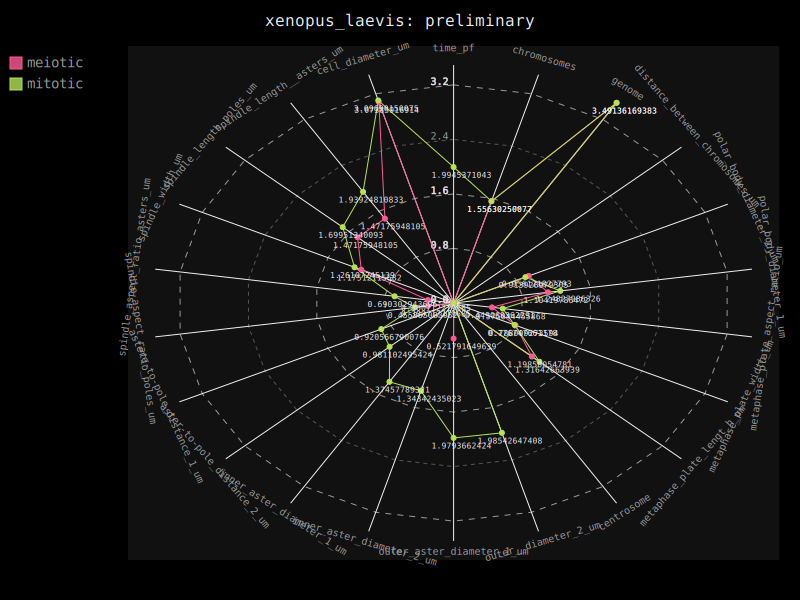

In [103]:
#try pygal
##http://pygal.org/builtin_styles/
#https://github.com/Kozea/pygal/blob/master/pygal/config.py

radarChart1=pygal.Radar()
radarChart1.config.x_labels=list(means.columns)
radarChart1.config.title='xenopus_laevis: preliminary'
radarChart1.config.width=800
radarChart1.config.height=600
radarChart1.add('meiotic',log_means_1)
radarChart1.add('mitotic',log_means_0)
#http://code.activestate.com/recipes/578123-draw-svg-images-in-python-python-recipe-enhanced-v/
SVG(radarChart1.render()) #drop: time_pf, chromosomes,genome, centrosome

#radarChart1.x_labels


##### There clearly are some irrelevant columns that should be dropped.

In [104]:
means2=means.drop(['time_pf', 'chromosomes','genome', 'centrosome'],axis=1)

In [105]:
log_means2_1=[np.log10(x) for x in means2.loc['xenopus_laevis',1].values]
log_means2_0=[np.log10(x) for x in means2.loc['xenopus_laevis',0].values]

In [106]:
min(log_means2_0), min(log_means2_1)

(-inf, -inf)

##### These are the columns left:

In [107]:
list(means2.columns)

['cell_diameter_um',
 'spindle_length__asters_um',
 'spindle_length_poles_um',
 'spindle_width_um',
 'spindle_aspect_ratio_asters_um',
 'spindle_aspect_ratio_poles_um',
 'astere-to-pole_distance_1_um',
 'aster-to-pole_distance_2_um',
 'inner_aster_diameter_1_um',
 'inner_aster_diameter_2_um',
 'outer_aster_diameter_1_um',
 'outer__diameter_2_um',
 'metaphase_plate_lengt_h_um',
 'metaphase_plate_width_um',
 'metaphase_plate_aspect_ratio_um',
 'polar_body_diameter_1_um',
 'polar_body_diameter_2_um',
 'distance_between_chromosomes_um']

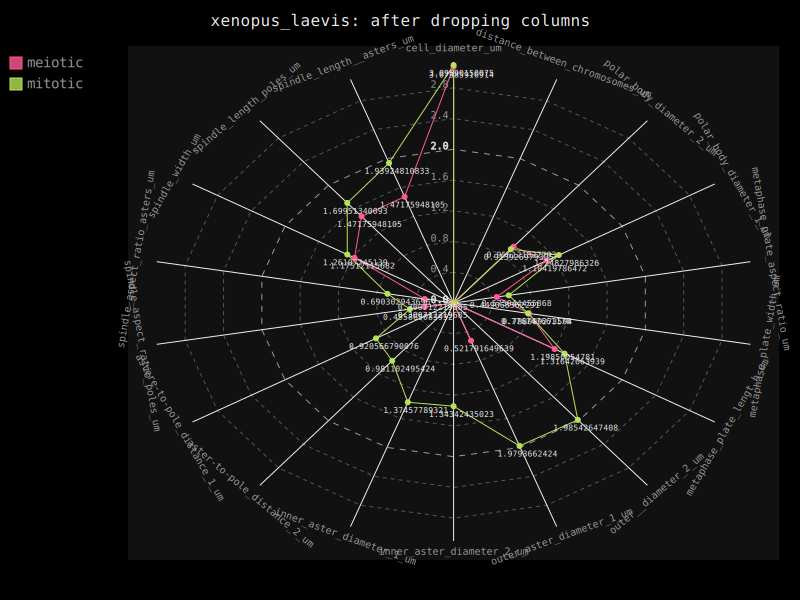

In [109]:
#try pygal
##http://pygal.org/builtin_styles/
#https://github.com/Kozea/pygal/blob/master/pygal/config.py

radarChart1=pygal.Radar()
radarChart1.config.x_labels=list(means2.columns)
radarChart1.config.title='xenopus_laevis: after dropping columns'
radarChart1.config.width=800
radarChart1.config.height=600
radarChart1.add('meiotic',log_means2_1)
radarChart1.add('mitotic',log_means2_0)
#http://code.activestate.com/recipes/578123-draw-svg-images-in-python-python-recipe-enhanced-v/
SVG(radarChart1.render()) #drop: time_pf, chromosomes,genome, centrosome

#radarChart1.x_labels



##### Change esthetics.

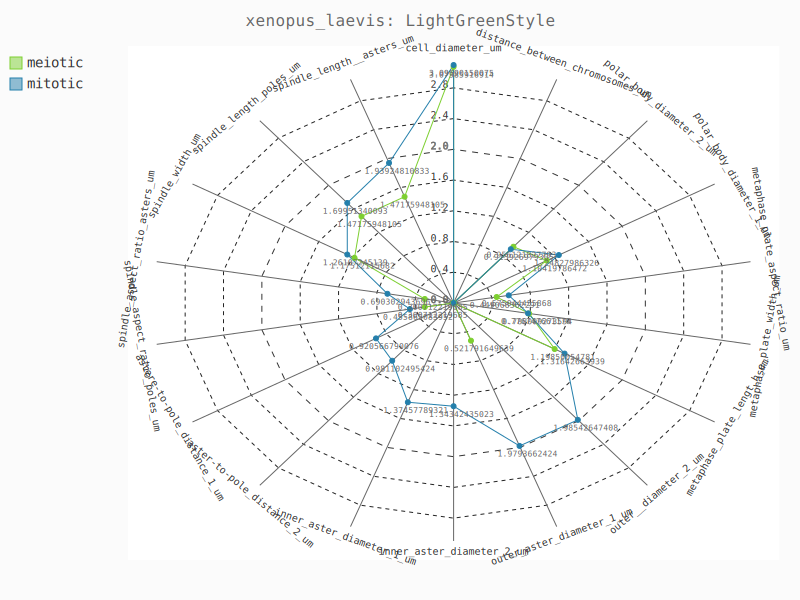

In [110]:
#try pygal
##http://pygal.org/builtin_styles/
#https://github.com/Kozea/pygal/blob/master/pygal/config.py
from pygal.style import LightGreenStyle

radarChart1=pygal.Radar(style= LightGreenStyle)
radarChart1.config.title='xenopus_laevis: LightGreenStyle'
radarChart1.config.x_labels=list(means2.columns)
#radarChart1.config.
radarChart1.config.width=800
radarChart1.config.height=600
radarChart1.add('meiotic',log_means2_1)
radarChart1.add('mitotic',log_means2_0)
#http://code.activestate.com/recipes/578123-draw-svg-images-in-python-python-recipe-enhanced-v/
SVG(radarChart1.render()) #drop: time_pf, chromosomes,genome, centrosome

#radarChart1.render_to_file('../Manuscript/Figures/F4/F4B/F4B_xenopus_laevis2.svg')


#radarChart1.x_labels
#can be converted to eps through inkscape: use either application or commandline:

#http://wiki.inkscape.org/wiki/index.php/MacOS_X (use alias! not soft link!)
#https://inkscape.org/doc/inkscape-man.html




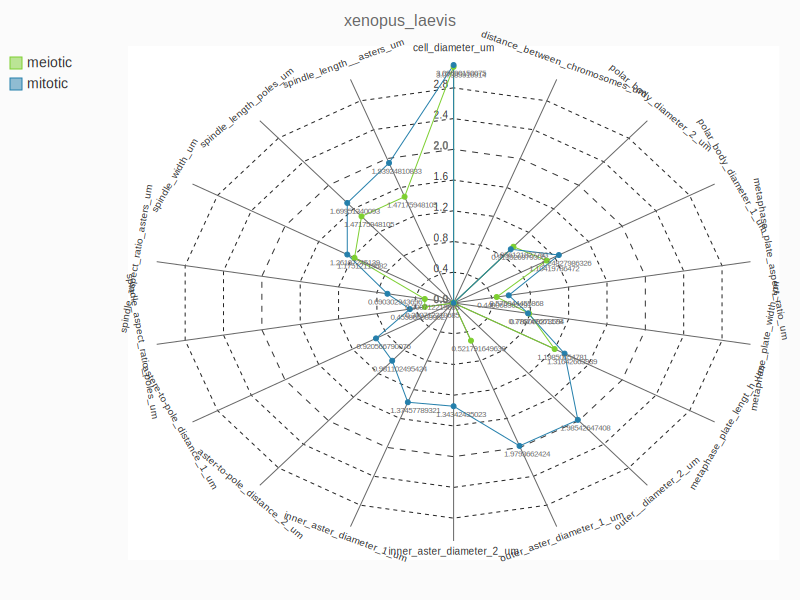

In [111]:
#try pygal
##http://pygal.org/builtin_styles/
#https://github.com/Kozea/pygal/blob/master/pygal/config.py

#from pygal.style import LightGreenStyle #MODIFY FROM: https://github.com/Kozea/pygal/blob/master/pygal/style.py
#modify style: http://pygal.org/custom_styles/

from pygal.style import Style
from pygal.colors import darken, lighten


customStyle = Style(
font_family='Helvetica',

background=lighten('#f3f3f3', 3),
plot_background='#fff',
foreground='#333333',
foreground_light='#666',
foreground_dark='#222222',
opacity='.5',
opacity_hover='.9',
transition='250ms ease-in',
colors=('#7dcf30', '#247fab', lighten('#7dcf30', 10), '#ccc',
        darken('#7dcf30', 15), '#ddd', lighten('#247fab', 10),
        darken('#247fab', 15)))

radarChart1=pygal.Radar(style= customStyle)
radarChart1.config.title='xenopus_laevis'
radarChart1.config.x_labels=list(means2.columns)
radarChart1.config.width=800
radarChart1.config.height=600
radarChart1.config.x_label_format
radarChart1.add('meiotic',log_means2_1)
radarChart1.add('mitotic',log_means2_0)

#http://code.activestate.com/recipes/578123-draw-svg-images-in-python-python-recipe-enhanced-v/
SVG(radarChart1.render()) #drop: time_pf, chromosomes,genome, centrosome
#radarChart1._repr_svg_()
#radarChart1.x_labels

Get R color scheme.    
[UPDATE] 01022015: This can be done faster and cleaner with Rmagic. 

In [113]:
#             asterina_miniata        caenorhabditis_elegans       cerebratulus_marginatus 
#                    "#F8766D"                     "#00B0F6"                     "#FF6A98" 
#           ciona_intestinalis            helobdella_robusta Strongylocentrotus_purpuratus 
#                    "#35A2FF"                     "#C09B00"                     "#E76BF3" 
#                urechis_caupo                xenopus_laevis         mytilus_californianus 
#                    "#EA8331"                     "#7CAE00"                     "#9590FF" 
#           xenopus_tropicalis                Equus_caballus                  Homo_sapiens 
#                    "#39B600"                     "#A3A500"                     "#00BB4E" 
#               Macaca_mulatta            Callithrix_jacchus         monodelphis_domestica 
#                    "#FF62BC"                     "#00BAE0"                     "#00C1A3" 
#                   sus_scrofa                  mus_musculus       drosophila_melanogaster 
#                    "#FA62DB"                     "#00BF7D"                     "#D89000" 
#                  danio_rerio        Clytia_hemisphaerica_1 
#                    "#00BAE0"                     "#C77CFF" 

In [114]:
color_dict={'asterina_miniata':"#F8766D" ,
            'caenorhabditis_elegans':"#00B0F6",
            'cerebratulus_marginatus':"#FF6A98",
            'ciona_intestinalis': "#35A2FF",
            'helobdella_robusta': "#C09B00",
            'Strongylocentrotus_purpuratus':"#E76BF3",
            'urechis_caupo':"#EA8331",
            'xenopus_laevis':"#7CAE00",
            'mytilus_californianus':"#9590FF",
            'xenopus_tropicalis':"#39B600" ,
            'Equus_caballus':"#A3A500",
            'Homo_sapiens':"#00BB4E",
            'Macaca_mulatta':"#FF62BC",
            'Callithrix_jacchus':"#00BAE0",
            'monodelphis_domestica':"#00C1A3",
            'sus_scrofa':"#FA62DB",
            'mus_musculus':"#00BF7D",
            'drosophila_melanogaster':"#D89000",
            'danio_rerio':"#00BAE0",
            'Clytia_hemisphaerica_1':"#C77CFF" }

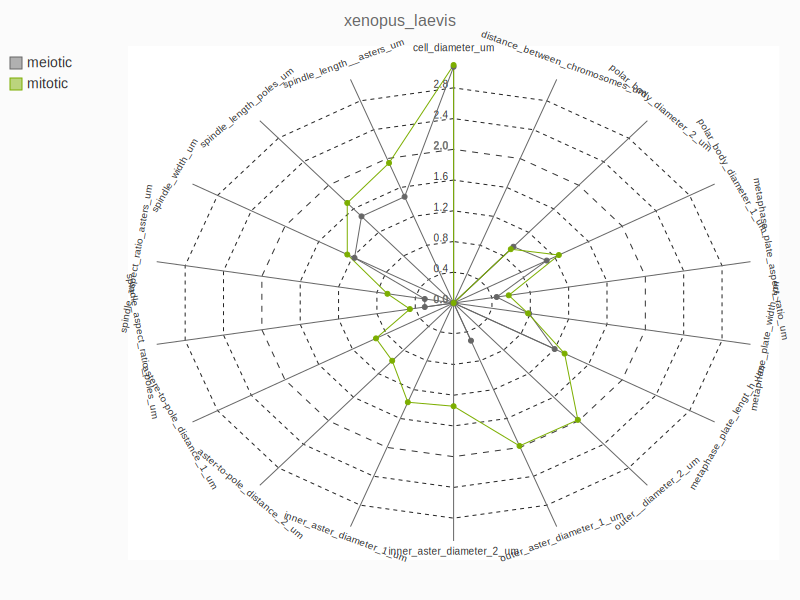

In [115]:
#try pygal
##http://pygal.org/builtin_styles/
#https://github.com/Kozea/pygal/blob/master/pygal/config.py

#from pygal.style import LightGreenStyle #MODIFY FROM: https://github.com/Kozea/pygal/blob/master/pygal/style.py
#modify style: http://pygal.org/custom_styles/

#to verify colors: 
#http://www.w3schools.com/tags/ref_colorpicker.asp

from pygal.style import Style
from pygal.colors import darken, lighten


customStyle = Style(
font_family='Helvetica',

background=lighten('#f3f3f3', 3), #outside of the plot
plot_background='#fff', #background
foreground='#333333', #text
foreground_light='#666', #spikes
foreground_dark='#222222', #internal lines
opacity='.5',
opacity_hover='.9',
transition='250ms ease-in',
colors=('#666666', '#7CAE00', lighten('#7dcf30', 10), '#ccc',
        darken('#7dcf30', 15), '#ddd', lighten('#247fab', 10),
        darken('#247fab', 15)))

radarChart1=pygal.Radar(style= customStyle)
#radarChart1.config.show_minor_y_labels=False

radarChart1.config.print_values=False

radarChart1.config.title='xenopus_laevis'
radarChart1.config.x_labels=list(means2.columns)
radarChart1.config.width=800
radarChart1.config.height=600
radarChart1.config.x_label_format
radarChart1.add('meiotic',log_means2_1)
radarChart1.add('mitotic',log_means2_0)

#http://code.activestate.com/recipes/578123-draw-svg-images-in-python-python-recipe-enhanced-v/
SVG(radarChart1.render()) #drop: time_pf, chromosomes,genome, centrosome
#radarChart1._repr_svg_()
#radarChart1.x_labels

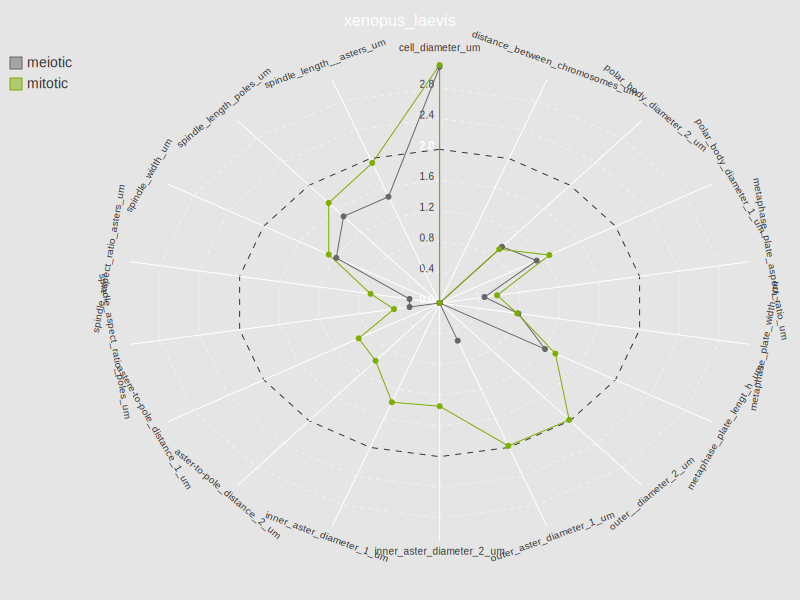

In [116]:
#try pygal
##http://pygal.org/builtin_styles/
#https://github.com/Kozea/pygal/blob/master/pygal/config.py

#from pygal.style import LightGreenStyle #MODIFY FROM: https://github.com/Kozea/pygal/blob/master/pygal/style.py
#modify style: http://pygal.org/custom_styles/

#to verify colors: 
#http://www.w3schools.com/tags/ref_colorpicker.asp

from pygal.style import Style
from pygal.colors import darken, lighten


customStyle = Style(
font_family='Helvetica',

background=lighten('#E5E5E5', 0), #outside of the plot
plot_background='#E5E5E5', #background
foreground='#333333', #text
foreground_light='#FFFFFF', #spikes
foreground_dark='#F2F2F2', #internal lines
opacity='.5',
opacity_hover='.9',
transition='250ms ease-in',
colors=('#666666', color_dict['xenopus_laevis']))#, lighten('#7dcf30', 10), '#ccc',
        #darken('#7dcf30', 15), '#ddd', lighten('#247fab', 10),
        #darken('#247fab', 15)))

radarChart1=pygal.Radar(style= customStyle)
#radarChart1.config.show_minor_y_labels=False
radarChart1.config.print_values=False
radarChart1.config.show_y_labels=False
radarChart1.config.title='xenopus_laevis'
#radarChart1.config.title_font_size=30

radarChart1.config.x_labels=list(means2.columns)
radarChart1.config.width=800
radarChart1.config.height=600
radarChart1.add('meiotic',log_means2_1)
radarChart1.add('mitotic',log_means2_0)

#http://code.activestate.com/recipes/578123-draw-svg-images-in-python-python-recipe-enhanced-v/
SVG(radarChart1.render()) #drop: time_pf, chromosomes,genome, centrosome
#radarChart1._repr_svg_()
#radarChart1.x_labels

In [117]:
#try pygal
##http://pygal.org/builtin_styles/
#https://github.com/Kozea/pygal/blob/master/pygal/config.py

#from pygal.style import LightGreenStyle #MODIFY FROM: https://github.com/Kozea/pygal/blob/master/pygal/style.py
#modify style: http://pygal.org/custom_styles/

#to verify colors: 
#http://www.w3schools.com/tags/ref_colorpicker.asp

from pygal.style import Style
from pygal.colors import darken, lighten


customStyle = Style(
font_family='Helvetica',

background=lighten('#E5E5E5', 0), #outside of the plot
plot_background='#E5E5E5', #background
foreground='#333333', #text
foreground_light='#FFFFFF', #spikes
foreground_dark='#F2F2F2', #internal lines
opacity='.5',
opacity_hover='.9',
transition='250ms ease-in',
colors=('#666666', color_dict['xenopus_laevis']))#, lighten('#7dcf30', 10), '#ccc',
        #darken('#7dcf30', 15), '#ddd', lighten('#247fab', 10),
        #darken('#247fab', 15)))

radarChart1=pygal.Radar(style= customStyle)
#radarChart1.config.show_minor_y_labels=False
radarChart1.config.print_values=False
radarChart1.config.show_y_labels=False
radarChart1.config.title='xenopus_laevis'
#radarChart1.config.title_font_size=30

radarChart1.config.x_labels=list(means2.columns)
radarChart1.config.width=800
radarChart1.config.height=600
radarChart1.add('meiotic',log_means2_1)
radarChart1.add('mitotic',log_means2_0)

#http://code.activestate.com/recipes/578123-draw-svg-images-in-python-python-recipe-enhanced-v/
#SVG(radarChart1.render()) #drop: time_pf, chromosomes,genome, centrosome
#radarChart1._repr_svg_()
#radarChart1.x_labels


#http://code.activestate.com/recipes/578123-draw-svg-images-in-python-python-recipe-enhanced-v/
#SVG(radarChart1.render()) #drop: time_pf, chromosomes,genome, centrosome
#radarChart1._repr_svg_()
#radarChart1.x_labels

radarChart1.render_to_file('../Manuscript/Figures/F4/F4B/F4B_xenopus_laevis_arial.svg')

#then: inkscape -z -D F4B_xenopus_laevis_helvetica.svg --export-eps=F4B_xenopus_laevisCLI_helvetica.eps

In [118]:
!/Applications/Inkscape.app/Contents/Resources/bin/inkscape -z -D ../Manuscript/Figures/F4/F4B/F4B_xenopus_laevis_arial.svg --export-eps=../Manuscript/Figures/F4/F4B/F4B_xenopus_laevis_arial.eps

W: AppleCollationOrder setting not found, using AppleLocale.
Setting LANGSTR from AppleLocale: en
Overriding empty LANG from /usr/share/locale/locale.alias
Setting Language: en_US.UTF-8


### Loop over all organisms.

In [119]:
means2.head()

cell_diameter_um  spindle_length__asters_um  \
organism                meiotic                                                
asterina_miniata        0              148.597495                  45.122942   
                        1              220.351184                  24.748558   
caenorhabditis_elegans  0               27.133618                  10.334325   
                        1               50.805108                   8.264418   
cerebratulus_marginatus 0               88.954545                  40.472727   

                                 spindle_length_poles_um  spindle_width_um  \
organism                meiotic                                              
asterina_miniata        0                      29.479782         16.841408   
                        1                      20.470540          8.521747   
caenorhabditis_elegans  0                       7.754700          4.911130   
                        1                       8.264418          5.679828   
cerebratulus_marginatus 0                      25.163636         15.290909   

                                 spindle_aspect_ratio_asters_um  \
organism                meiotic                                   
asterina_miniata        0                              2.752330   
                        1                              3.041225   
caenorhabditis_elegans  0                              2.160014   
                        1                              1.482831   
cerebratulus_marginatus 0                              2.657838   

                                 spindle_aspect_ratio_poles_um  \
organism                meiotic                                  
asterina_miniata        0                             1.800700   
                        1                             2.512970   
caenorhabditis_elegans  0                             1.618049   
                        1                             1.482831   
cerebratulus_marginatus 0                             1.658557   

                                 astere-to-pole_distance_1_um  \
organism                meiotic                                 
asterina_miniata        0                            3.611328   
                        1                            0.446234   
caenorhabditis_elegans  0                            0.000000   
                        1                            0.000000   
cerebratulus_marginatus 0                            2.300000   

                                 aster-to-pole_distance_2_um  \
organism                meiotic                                
asterina_miniata        0                           3.849842   
                        1                           0.167230   
caenorhabditis_elegans  0                           0.000000   
                        1                           0.000000   
cerebratulus_marginatus 0                           2.100000   

                                 inner_aster_diameter_1_um  \
organism                meiotic                              
asterina_miniata        0                        10.950803   
                        1                         4.461345   
caenorhabditis_elegans  0                         3.044559   
                        1                         0.000000   
cerebratulus_marginatus 0                        13.581818   

                                 inner_aster_diameter_2_um  \
organism                meiotic                              
asterina_miniata        0                        10.789391   
                        1                         4.386613   
caenorhabditis_elegans  0                         2.865042   
                        1                         0.000000   
cerebratulus_marginatus 0                        13.709091   

                                 outer_aster_diameter_1_um  \
organism                meiotic                              
asterina_miniata        0                        46.173089   
                        1      

In [120]:
means2.index

MultiIndex(levels=[[u'Callithrix_jacchus', u'Clytia_hemisphaerica_1', u'Equus_caballus', u'Homo_sapiens', u'Macaca_mulatta', u'Strongylocentrotus_purpuratus', u'asterina_miniata', u'caenorhabditis_elegans', u'cerebratulus_marginatus', u'ciona_intestinalis', u'danio_rerio', u'drosophila_melanogaster', u'helobdella_robusta', u'monodelphis_domestica', u'mus_musculus', u'mytilus_californianus', u'sus_scrofa', u'urechis_caupo', u'xenopus_laevis', u'xenopus_tropicalis'], [0, 1]],
           labels=[[6, 6, 7, 7, 8, 8, 9, 9, 12, 12, 5, 5, 17, 17, 18, 18, 15, 19, 2, 3, 4, 0, 13, 16, 14, 14, 11, 10, 1], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1]],
           names=[u'organism', u'meiotic'])

In [121]:
means2.index.names, means2.index.names[0]

(FrozenList([u'organism', u'meiotic']), 'organism')

In [379]:
#use for DF iteration
for organism in means2.index.levels[0]:
    print organism #use this as an organism

Callithrix_jacchus
Clytia_hemisphaerica_1
Equus_caballus
Homo_sapiens
Macaca_mulatta
Strongylocentrotus_purpuratus
asterina_miniata
caenorhabditis_elegans
cerebratulus_marginatus
ciona_intestinalis
danio_rerio
drosophila_melanogaster
helobdella_robusta
monodelphis_domestica
mus_musculus
mytilus_californianus
sus_scrofa
urechis_caupo
xenopus_laevis
xenopus_tropicalis


In [122]:
print min(means2.loc['asterina_miniata',0]),max(means2.loc['asterina_miniata',0])
print min(means2.loc['asterina_miniata',1]),max(means2.loc['asterina_miniata',1])

0.161780336134 148.597494538
0.0 220.35118375


In [126]:
#class radarPlot
#method 1: takes organism and the grouped data frame (put grouping as a method too?)
def calculate_2_log10(organism):
    log_means2_0=[np.log10(x) for x in means2.loc[organism,0].values]
    log_means2_1=[np.log10(x) for x in means2.loc[organism,1].values]
    return log_means2_0,log_means2_1 #mitotic, meiotic

In [130]:
#calculate_2_log10('asterina_miniata'),calculate_3_log10('asterina_miniata')

In [382]:
org=calculate_log10('asterina_miniata')

In [383]:
np.log10(0+0.01)

-2.0

### The function that plots radar/spider plots for all organisms:

This function utilizes means2.

In [135]:
#THIS SHOULD BE THE FUNCTION THAT PLOTS ALL ORGANISMS
#try pygal
##http://pygal.org/builtin_styles/
#https://github.com/Kozea/pygal/blob/master/pygal/config.py

#from pygal.style import LightGreenStyle #MODIFY FROM: https://github.com/Kozea/pygal/blob/master/pygal/style.py
#modify style: http://pygal.org/custom_styles/

#to verify colors: 
#http://www.w3schools.com/tags/ref_colorpicker.asp

from pygal.style import Style
from pygal.colors import darken, lighten

def plotRadar(organism, twoElementDataTuple): #method 2
    #esthetics:
    customStyle = Style(
    font_family='Arial',
    background=lighten('#E5E5E5', 0), #outside of the plot
    plot_background='#E5E5E5', #background
    foreground='#333333', #text
    foreground_light='#FFFFFF', #spikes
    foreground_dark='#F2F2F2', #internal lines
    opacity='.5',
    opacity_hover='.9',
    transition='250ms ease-in',
    colors=('#666666', color_dict[organism]))#, lighten('#7dcf30', 10), '#ccc',
        #darken('#7dcf30', 15), '#ddd', lighten('#247fab', 10),
        #darken('#247fab', 15)))
    
    
    
    radarChart1=pygal.Radar(style= customStyle)
    radarChart1.config.title=str(organism)+'_log10'
    radarChart1.config.x_labels=list(means2.columns) #change for the next function; means2 should be an argument!!!

    radarChart1.config.print_values=False


    radarChart1.config.width=800
    radarChart1.config.height=600
    #radarChart1.config.x_label_format
    radarChart1.add('meiotic',twoElementDataTuple[1])
    radarChart1.add('mitotic',twoElementDataTuple[0])

    radarChart1.render_to_file('../Manuscript/Figures/F4/F4B/TEST/F4B_'+ str(organism)+'_log10_arial.svg')


#http://code.activestate.com/recipes/578123-draw-svg-images-in-python-python-recipe-enhanced-v/

#SVG(radarChart1.render()) #drop: time_pf, chromosomes,genome, centrosome
#radarChart1._repr_svg_()
#radarChart1.x_labels
#inkscape -z -D F4B_xenopus_laevis_arial.svg --export-eps=F4B_xenopus_laevisCLI_arial.eps

In [385]:
#plotRadar('asterina_miniata',calculate_log10('asterina_miniata'))

In [136]:
for organism in means2.index.levels[0]:
    #print organism #use this as an organism
    #https://docs.python.org/2/tutorial/errors.html
    try:
        plotRadar(organism,calculate_2_log10(organism))
    except KeyError:
        print organism

Callithrix_jacchus
Clytia_hemisphaerica_1
Equus_caballus
Homo_sapiens
Macaca_mulatta
danio_rerio
drosophila_melanogaster
monodelphis_domestica
mytilus_californianus
sus_scrofa
xenopus_tropicalis


In [387]:
for organism in means3.index.levels[0]:
    #print organism #use this as an organism
    #https://docs.python.org/2/tutorial/errors.html
    try:
        calculate_log10(organism)
    except KeyError:
        print organism

Callithrix_jacchus
Clytia_hemisphaerica_1
Equus_caballus
Macaca_mulatta
danio_rerio
monodelphis_domestica
mytilus_californianus
sus_scrofa
xenopus_tropicalis


In [137]:
#convert to eps
#inkscape -z -D F4B_xenopus_laevis_arial.svg --export-eps=F4B_xenopus_laevisCLI_arial.eps
import subprocess as sp
import shlex

In [138]:
!ls ../Manuscript/Figures/F4/F4B/TEST

A_problematic_organisms_no_plot.txt
F4B_Strongylocentrotus_purpuratus_log10_arial.svg
F4B_asterina_miniata_log10_arial.svg
F4B_caenorhabditis_elegans_log10_arial.svg
F4B_cerebratulus_marginatus_log10_arial.svg
F4B_ciona_intestinalis_log10_arial.svg
F4B_helobdella_robusta_log10_arial.svg
F4B_mus_musculus_log10_arial.svg
F4B_urechis_caupo_log10_arial.svg
F4B_xenopus_laevis_log10_arial.svg


In [141]:
#method3
for organism in means2.index.levels[0]:
    #print organism #use this as an organism
    #https://docs.python.org/2/tutorial/errors.html
    try:
        sp.call(shlex.split('/Applications/Inkscape.app/Contents/Resources/bin/inkscape -z -D ../Manuscript/Figures/F4/F4B/TEST/F4B_' + organism + '_log10_arial.svg --export-eps=../Manuscript/Figures/F4/F4B/TEST/F4B_'+ organism+'_log10_CLI_arial_TEST.eps'))
    except KeyError:
        print shlex.split('/Applications/Inkscape.app/Contents/Resources/bin/inkscape -z -D ../Manuscript/Figures/F4/F4B/TEST/F4B_' + organism + '_log10_arial.svg --export-eps=../Manuscript/Figures/F4/F4B/TEST/F4B_'+ organism+'_log10_CLI_arial_TEST.eps')        

In [142]:
!ls ../Manuscript/Figures/F4/F4B/TEST

A_problematic_organisms_no_plot.txt
F4B_Strongylocentrotus_purpuratus_log10_CLI_arial_TEST.eps
F4B_Strongylocentrotus_purpuratus_log10_arial.svg
F4B_asterina_miniata_log10_CLI_arial_TEST.eps
F4B_asterina_miniata_log10_arial.svg
F4B_caenorhabditis_elegans_log10_CLI_arial_TEST.eps
F4B_caenorhabditis_elegans_log10_arial.svg
F4B_cerebratulus_marginatus_log10_CLI_arial_TEST.eps
F4B_cerebratulus_marginatus_log10_arial.svg
F4B_ciona_intestinalis_log10_CLI_arial_TEST.eps
F4B_ciona_intestinalis_log10_arial.svg
F4B_helobdella_robusta_log10_CLI_arial_TEST.eps
F4B_helobdella_robusta_log10_arial.svg
F4B_mus_musculus_log10_arial.svg
F4B_urechis_caupo_log10_CLI_arial_TEST.eps
F4B_urechis_caupo_log10_arial.svg
F4B_xenopus_laevis_log10_CLI_arial_TEST.eps
F4B_xenopus_laevis_log10_arial.svg


In [143]:
my_input=shlex.split('/Applications/Inkscape.app/Contents/Resources/bin/inkscape -z -D ../Manuscript/Figures/F4/F4B/F4B_xenopus_laevis_arial.svg --export-eps=../Manuscript/Figures/F4/F4B/F4B_xenopus_laevisCLI_arial_TEST.eps')

In [144]:
my_input

['/Applications/Inkscape.app/Contents/Resources/bin/inkscape',
 '-z',
 '-D',
 '../Manuscript/Figures/F4/F4B/F4B_xenopus_laevis_arial.svg',
 '--export-eps=../Manuscript/Figures/F4/F4B/F4B_xenopus_laevisCLI_arial_TEST.eps']

In [145]:
sp.call(my_input)

0

In [146]:
means2.head()

cell_diameter_um  spindle_length__asters_um  \
organism                meiotic                                                
asterina_miniata        0              148.597495                  45.122942   
                        1              220.351184                  24.748558   
caenorhabditis_elegans  0               27.133618                  10.334325   
                        1               50.805108                   8.264418   
cerebratulus_marginatus 0               88.954545                  40.472727   

                                 spindle_length_poles_um  spindle_width_um  \
organism                meiotic                                              
asterina_miniata        0                      29.479782         16.841408   
                        1                      20.470540          8.521747   
caenorhabditis_elegans  0                       7.754700          4.911130   
                        1                       8.264418          5.679828   
cerebratulus_marginatus 0                      25.163636         15.290909   

                                 spindle_aspect_ratio_asters_um  \
organism                meiotic                                   
asterina_miniata        0                              2.752330   
                        1                              3.041225   
caenorhabditis_elegans  0                              2.160014   
                        1                              1.482831   
cerebratulus_marginatus 0                              2.657838   

                                 spindle_aspect_ratio_poles_um  \
organism                meiotic                                  
asterina_miniata        0                             1.800700   
                        1                             2.512970   
caenorhabditis_elegans  0                             1.618049   
                        1                             1.482831   
cerebratulus_marginatus 0                             1.658557   

                                 astere-to-pole_distance_1_um  \
organism                meiotic                                 
asterina_miniata        0                            3.611328   
                        1                            0.446234   
caenorhabditis_elegans  0                            0.000000   
                        1                            0.000000   
cerebratulus_marginatus 0                            2.300000   

                                 aster-to-pole_distance_2_um  \
organism                meiotic                                
asterina_miniata        0                           3.849842   
                        1                           0.167230   
caenorhabditis_elegans  0                           0.000000   
                        1                           0.000000   
cerebratulus_marginatus 0                           2.100000   

                                 inner_aster_diameter_1_um  \
organism                meiotic                              
asterina_miniata        0                        10.950803   
                        1                         4.461345   
caenorhabditis_elegans  0                         3.044559   
                        1                         0.000000   
cerebratulus_marginatus 0                        13.581818   

                                 inner_aster_diameter_2_um  \
organism                meiotic                              
asterina_miniata        0                        10.789391   
                        1                         4.386613   
caenorhabditis_elegans  0                         2.865042   
                        1                         0.000000   
cerebratulus_marginatus 0                        13.709091   

                                 outer_aster_diameter_1_um  \
organism                meiotic                              
asterina_miniata        0                        46.173089   
                        1      

##Additional columns to drop

E-mail from Marina (fedback & comments): 12222014: *cell diameter, distance between chromosomes, polar_body_diameter_1, polar_body_diameter_2*

In [150]:
means3=means2.drop(['cell_diameter_um', 'distance_between_chromosomes_um', 'polar_body_diameter_1_um', 'polar_body_diameter_2_um'],axis=1)

In [151]:
means2.columns

Index([u'cell_diameter_um', u'spindle_length__asters_um', u'spindle_length_poles_um', u'spindle_width_um', u'spindle_aspect_ratio_asters_um', u'spindle_aspect_ratio_poles_um', u'astere-to-pole_distance_1_um', u'aster-to-pole_distance_2_um', u'inner_aster_diameter_1_um', u'inner_aster_diameter_2_um', u'outer_aster_diameter_1_um', u'outer__diameter_2_um', u'metaphase_plate_lengt_h_um', u'metaphase_plate_width_um', u'metaphase_plate_aspect_ratio_um', u'polar_body_diameter_1_um', u'polar_body_diameter_2_um', u'distance_between_chromosomes_um'], dtype='object')

In [152]:
means3.columns

Index([u'spindle_length__asters_um', u'spindle_length_poles_um', u'spindle_width_um', u'spindle_aspect_ratio_asters_um', u'spindle_aspect_ratio_poles_um', u'astere-to-pole_distance_1_um', u'aster-to-pole_distance_2_um', u'inner_aster_diameter_1_um', u'inner_aster_diameter_2_um', u'outer_aster_diameter_1_um', u'outer__diameter_2_um', u'metaphase_plate_lengt_h_um', u'metaphase_plate_width_um', u'metaphase_plate_aspect_ratio_um'], dtype='object')

##Columns to combine

In [153]:
#e-mail: 12222014: 
#try:  polar_body_diameter_1 & polar_body_diameter_2

#Outer_aster_diameter_1 & outer_aster_diameter _2
#Inner_aster_diameter_1 & inner_aster_diameter_2
#Aster-to-pole_distance_1 & Aster-to-pole_distance_2

In [154]:
means3['outer_aster_diameter']=means3[['outer_aster_diameter_1_um','outer__diameter_2_um']].mean(axis=1)

In [155]:
means3=means3.drop(['outer_aster_diameter_1_um','outer__diameter_2_um'],axis=1)

In [156]:
means3['inner_aster_diameter']=means3[['inner_aster_diameter_1_um','inner_aster_diameter_2_um']].mean(axis=1)

In [157]:
means3=means3.drop(['inner_aster_diameter_1_um','inner_aster_diameter_2_um'],axis=1)

In [158]:
means3['aster-to-pole_distance']=means3[['astere-to-pole_distance_1_um','aster-to-pole_distance_2_um']].mean(axis=1)

In [159]:
means3=means3.drop(['astere-to-pole_distance_1_um','aster-to-pole_distance_2_um'],axis=1)

In [160]:
means3.columns

Index([u'spindle_length__asters_um', u'spindle_length_poles_um', u'spindle_width_um', u'spindle_aspect_ratio_asters_um', u'spindle_aspect_ratio_poles_um', u'metaphase_plate_lengt_h_um', u'metaphase_plate_width_um', u'metaphase_plate_aspect_ratio_um', u'outer_aster_diameter', u'inner_aster_diameter', u'aster-to-pole_distance'], dtype='object')

In [161]:
means3.loc['mus_musculus']

,spindle_length__asters_um,spindle_length_poles_um,spindle_width_um,spindle_aspect_ratio_asters_um,spindle_aspect_ratio_poles_um,metaphase_plate_lengt_h_um,metaphase_plate_width_um,metaphase_plate_aspect_ratio_um,outer_aster_diameter,inner_aster_diameter,aster-to-pole_distance
meiotic,,,,,,,,,,,
0,NaN,24.053846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26.865455,26.865455,15.22,1.555556,1.555556,14.74,5.154545,2.717647,0,0,0


In [162]:
means3.loc['mus_musculus']
means3.drop(means3.loc['mus_musculus'],level=1,axis=0,inplace=True)

##### The plotting issue was due to NaN in the data frame. Somehow pygal cannot deal with them.

In [163]:
means3=means3.fillna(0)

In [164]:
means3

spindle_length__asters_um  \
organism                      meiotic                              
asterina_miniata              0                        45.122942   
                              1                        24.748558   
caenorhabditis_elegans        0                        10.334325   
                              1                         8.264418   
cerebratulus_marginatus       0                        40.472727   
                              1                        17.033333   
ciona_intestinalis            0                        44.718038   
                              1                         9.577313   
helobdella_robusta            0                        28.995002   
                              1                        51.211876   
Strongylocentrotus_purpuratus 0                        24.355039   
                              1                        22.274032   
urechis_caupo                 0                        42.599817   
                              1                        30.585606   
xenopus_laevis                0                        86.945700   
                              1                        29.631899   
mytilus_californianus         1                        24.252905   
xenopus_tropicalis            1                        23.834488   
Equus_caballus                1                        20.609333   
Homo_sapiens                  1                        15.209470   
Macaca_mulatta                1                        22.743900   
Callithrix_jacchus            1                        22.932187   
monodelphis_domestica         1                        16.087825   
sus_scrofa                    1                        14.352270   
mus_musculus                  0                         0.000000   
                              1                        26.865455   
drosophila_melanogaster       1                        10.708600   
danio_rerio                   0                        47.083140   
Clytia_hemisphaerica_1        1                        14.500000   

                                       spindle_length_poles_um  \
organism                      meiotic                            
asterina_miniata              0                      29.479782   
                              1                      20.470540   
caenorhabditis_elegans        0                       7.754700   
                              1                       8.264418   
cerebratulus_marginatus       0                      25.163636   
                              1                      14.700000   
ciona_intestinalis            0                      23.039272   
                              1                       9.577313   
helobdella_robusta            0                      20.629630   
                              1                      36.151072   
Strongylocentrotus_purpuratus 0                      16.222143   
                              1                      17.545496   
urechis_caupo                 0                      30.781910   
                              1                      25.074681   
xenopus_laevis                0                      50.062600   
                              1                      29.631899   
mytilus_californianus         1                      21.625767   
xenopus_tropicalis            1                      23.834488   
Equus_caballus                1                      20.609333   
Homo_sapiens                  1                      15.209470   
Macaca_mulatta                1                      22.743900   
Callithrix_jacchus            1                      22.932187   
monodelphis_domestica         1                      16.087825   
sus_scrofa                    1                      14.352270   
mus_musculus                  0                      24.053846   
                              1                      26.865455   
drosophila_melanogaster       1                      10.708600   
danio_rerio     

##Re-plot


In [165]:
#class radarPlot
#method 1: takes organism and the grouped data frame (put grouping as a method too?)
def calculate_3_log10(organism):
    log_means3_0=[np.log10(x) for x in means3.loc[organism,0].values]
    log_means3_1=[np.log10(x) for x in means3.loc[organism,1].values]
    return log_means3_0,log_means3_1 #mitotic, meiotic

In [166]:
#THIS SHOULD BE THE FUNCTION THAT PLOTS ALL ORGANISMS
#try pygal
##http://pygal.org/builtin_styles/
#https://github.com/Kozea/pygal/blob/master/pygal/config.py

#from pygal.style import LightGreenStyle #MODIFY FROM: https://github.com/Kozea/pygal/blob/master/pygal/style.py
#modify style: http://pygal.org/custom_styles/

#to verify colors: 
#http://www.w3schools.com/tags/ref_colorpicker.asp


from pygal.style import Style
from pygal.colors import darken, lighten

def plotRadar(organism, twoElementDataTuple): #method 2
   
    customStyle = Style(
    font_family='Arial',
    background=lighten('#E5E5E5', 0), #outside of the plot
    plot_background='#E5E5E5', #background
    foreground='#333333', #text
    foreground_light='#FFFFFF', #spikes
    foreground_dark='#F2F2F2', #internal lines
    opacity='.5',
    opacity_hover='.9',
    transition='250ms ease-in',
    colors=('#666666', color_dict[organism]))#, lighten('#7dcf30', 10), '#ccc',
        #darken('#7dcf30', 15), '#ddd', lighten('#247fab', 10),
        #darken('#247fab', 15)))
    
    
    
    radarChart1=pygal.Radar(style= customStyle)
    radarChart1.config.title=str(organism)+'_log10'
    radarChart1.config.x_labels=list(means3.columns) #change here

    radarChart1.config.print_values=False


    radarChart1.config.width=800
    radarChart1.config.height=600
    #radarChart1.config.x_label_format
    radarChart1.add('meiotic',twoElementDataTuple[1])
    radarChart1.add('mitotic',twoElementDataTuple[0])

    radarChart1.render_to_file('../Manuscript/Figures/F4/F4B/FINAL_LOG/F4B_'+ str(organism)+'_log10_arial.svg')


#http://code.activestate.com/recipes/578123-draw-svg-images-in-python-python-recipe-enhanced-v/

#SVG(radarChart1.render()) #drop: time_pf, chromosomes,genome, centrosome
#radarChart1._repr_svg_()
#radarChart1.x_labels
#inkscape -z -D F4B_xenopus_laevis_arial.svg --export-eps=F4B_xenopus_laevisCLI_arial.eps

In [167]:
np.log10(np.nan)

nan

In [168]:
means3.loc['mus_musculus']

,spindle_length__asters_um,spindle_length_poles_um,spindle_width_um,spindle_aspect_ratio_asters_um,spindle_aspect_ratio_poles_um,metaphase_plate_lengt_h_um,metaphase_plate_width_um,metaphase_plate_aspect_ratio_um,outer_aster_diameter,inner_aster_diameter,aster-to-pole_distance
meiotic,,,,,,,,,,,
0,0.000000,24.053846,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0,0,0
1,26.865455,26.865455,15.22,1.555556,1.555556,14.74,5.154545,2.717647,0,0,0


In [169]:
for organism in means3.index.levels[0]:
    print 'processing... '+organism #use this as an organism
    #https://docs.python.org/2/tutorial/errors.html
    try:
        plotRadar(organism,calculate_3_log10(organism))
        #calculate_log10(organism)
    except KeyError:
        print 'problematic '+ organism
    except ValueError:
        print "value"

processing... Callithrix_jacchus
problematic Callithrix_jacchus
processing... Clytia_hemisphaerica_1
problematic Clytia_hemisphaerica_1
processing... Equus_caballus
problematic Equus_caballus
processing... Homo_sapiens
problematic Homo_sapiens
processing... Macaca_mulatta
problematic Macaca_mulatta
processing... Strongylocentrotus_purpuratus
processing... asterina_miniata
processing... caenorhabditis_elegans
processing... cerebratulus_marginatus
processing... ciona_intestinalis
processing... danio_rerio
problematic danio_rerio
processing... drosophila_melanogaster
problematic drosophila_melanogaster
processing... helobdella_robusta
processing... monodelphis_domestica
problematic monodelphis_domestica
processing... mus_musculus
processing... mytilus_californianus
problematic mytilus_californianus
processing... sus_scrofa
problematic sus_scrofa
processing... urechis_caupo
processing... xenopus_laevis
processing... xenopus_tropicalis
problematic xenopus_tropicalis


In [171]:
#method3
for organism in means3.index.levels[0]:
    #print organism #use this as an organism
    #https://docs.python.org/2/tutorial/errors.html
    try:
        sp.call(shlex.split('/Applications/Inkscape.app/Contents/Resources/bin/inkscape -z -D ../Manuscript/Figures/F4/F4B/FINAL_LOG/F4B_' + organism + '_log10_arial.svg --export-eps=../Manuscript/Figures/F4/F4B/FINAL_LOG/F4B_'+ organism+'_log10_CLI_arial_TEST.eps'))
    except KeyError:
        print shlex.split('/Applications/Inkscape.app/Contents/Resources/bin/inkscape -z -D ../Manuscript/Figures/F4/F4B/FINAL_LOG/F4B_' + organism + '_log10_arial.svg --export-eps=../Manuscript/Figures/F4/F4B/FINAL_LOG/F4B_'+ organism+'_log10_CLI_arial_TEST.eps')
        

### NOT LOG

In [170]:
#THIS SHOULD BE THE FUNCTION THAT PLOTS ALL ORGANISMS
#try pygal
##http://pygal.org/builtin_styles/
#https://github.com/Kozea/pygal/blob/master/pygal/config.py

#from pygal.style import LightGreenStyle #MODIFY FROM: https://github.com/Kozea/pygal/blob/master/pygal/style.py
#modify style: http://pygal.org/custom_styles/

#to verify colors: 
#http://www.w3schools.com/tags/ref_colorpicker.asp


from pygal.style import Style
from pygal.colors import darken, lighten

def plotRadar(organism, twoElementDataTuple): #method 2
   
    customStyle = Style(
    font_family='Arial',
    background=lighten('#E5E5E5', 0), #outside of the plot
    plot_background='#E5E5E5', #background
    foreground='#333333', #text
    foreground_light='#FFFFFF', #spikes
    foreground_dark='#F2F2F2', #internal lines
    opacity='.5',
    opacity_hover='.9',
    transition='250ms ease-in',
    colors=('#666666', color_dict[organism]))#, lighten('#7dcf30', 10), '#ccc',
        #darken('#7dcf30', 15), '#ddd', lighten('#247fab', 10),
        #darken('#247fab', 15)))
    
    
    
    radarChart1=pygal.Radar(style= customStyle)
    radarChart1.config.title=str(organism)+'_log10'
    radarChart1.config.x_labels=list(means3.columns) #change here

    radarChart1.config.print_values=False


    radarChart1.config.width=800
    radarChart1.config.height=600
    #radarChart1.config.x_label_format
    radarChart1.add('meiotic',twoElementDataTuple[1])
    radarChart1.add('mitotic',twoElementDataTuple[0])

    radarChart1.render_to_file('../Manuscript/Figures/F4/F4B/FINAL_NOT_LOG/F4B_'+ str(organism)+'_log10_arial.svg')


#http://code.activestate.com/recipes/578123-draw-svg-images-in-python-python-recipe-enhanced-v/

#SVG(radarChart1.render()) #drop: time_pf, chromosomes,genome, centrosome
#radarChart1._repr_svg_()
#radarChart1.x_labels
#inkscape -z -D F4B_xenopus_laevis_arial.svg --export-eps=F4B_xenopus_laevisCLI_arial.eps

In [175]:
#class radarPlot
#method 1: takes organism and the grouped data frame (put grouping as a method too?)

#re-write as generator
def pass_data_to_plotter(organism):
    means3_0=[x for x in means3.loc[organism,0].values]
    means3_1=[x for x in means3.loc[organism,1].values]
    return means3_0,means3_1 #mitotic, meiotic

In [176]:
for organism in means3.index.levels[0]:
    print 'processing... '+organism #use this as an organism
    #https://docs.python.org/2/tutorial/errors.html
    try:
        plotRadar(organism,pass_data_to_plotter(organism))
        #calculate_log10(organism)
    except KeyError:
        print 'problematic '+ organism
    except ValueError:
        print "value"

processing... Callithrix_jacchus
problematic Callithrix_jacchus
processing... Clytia_hemisphaerica_1
problematic Clytia_hemisphaerica_1
processing... Equus_caballus
problematic Equus_caballus
processing... Homo_sapiens
problematic Homo_sapiens
processing... Macaca_mulatta
problematic Macaca_mulatta
processing... Strongylocentrotus_purpuratus
processing... asterina_miniata
processing... caenorhabditis_elegans
processing... cerebratulus_marginatus
processing... ciona_intestinalis
processing... danio_rerio
problematic danio_rerio
processing... drosophila_melanogaster
problematic drosophila_melanogaster
processing... helobdella_robusta
processing... monodelphis_domestica
problematic monodelphis_domestica
processing... mus_musculus
processing... mytilus_californianus
problematic mytilus_californianus
processing... sus_scrofa
problematic sus_scrofa
processing... urechis_caupo
processing... xenopus_laevis
processing... xenopus_tropicalis
problematic xenopus_tropicalis


In [177]:
#method3
for organism in means3.index.levels[0]:
    #print organism #use this as an organism
    #https://docs.python.org/2/tutorial/errors.html
    try:
        sp.call(shlex.split('/Applications/Inkscape.app/Contents/Resources/bin/inkscape -z -D ../Manuscript/Figures/F4/F4B/FINAL_NOT_LOG/F4B_' + organism + '_log10_arial.svg --export-eps=../Manuscript/Figures/F4/F4B/FINAL_NOT_LOG/F4B_'+ organism+'_log10_CLI_arial_TEST.eps'))
    except KeyError:
        print shlex.split('/Applications/Inkscape.app/Contents/Resources/bin/inkscape -z -D ../Manuscript/Figures/F4/F4B/FINAL_NOT_LOG/F4B_' + organism + '_log10_arial.svg --export-eps=../Manuscript/Figures/F4/F4B/FINAL_NOT_LOG/F4B_'+ organism+'_log10_CLI_arial_TEST.eps')
        